<a href="https://colab.research.google.com/github/helah20/Machine_learning/blob/main/02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Evaluation Assignment:

Group members:
- Shaima Alharbi 
- Ebtisam Alruhili
- Aljowhara Alblaihed
- Hailah Alharthi

---

1. Read in the dataset from the below link with pandas...

In [ ]:
import pandas as pd
link = "https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv"
df= pd.read_csv(link)

2. Show me some of the data...

In [ ]:
df.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [ ]:
df.sample(10)

,height,weight,target,type
186,58.0,162.0,1.0,horse
88,41.0,106.0,0.0,dog
22,32.0,84.0,0.0,dog
176,78.0,137.0,1.0,horse
149,79.0,151.0,1.0,horse
34,33.0,98.0,0.0,dog
76,33.0,45.0,0.0,dog
129,43.0,133.0,1.0,horse
128,65.0,119.0,1.0,horse
152,45.0,154.0,1.0,horse


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  200 non-null    float64
 1   weight  200 non-null    float64
 2   target  200 non-null    float64
 3   type    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.isna().sum() # check if there is null values

height    0
weight    0
target    0
type      0
dtype: int64

In [ ]:
#explore how many have from each type
df.type.value_counts()

horse    100
dog      100
Name: type, dtype: int64

In [ ]:
df[['target','type']] # find the relation between target and type , we noticed that target =0 when the type is dog and target =1 when the type is horse

,target,type
0,0.0,dog
1,0.0,dog
2,0.0,dog
3,0.0,dog
4,0.0,dog
...,...,...
195,1.0,horse
196,1.0,horse
197,1.0,horse
198,1.0,horse


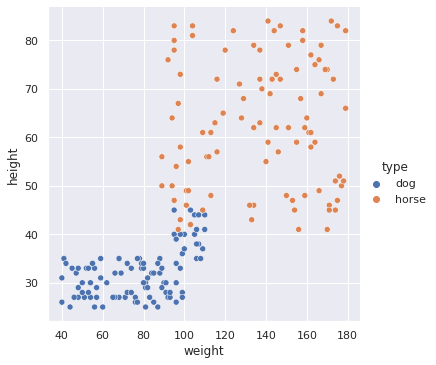

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.relplot(x="weight", y="height",hue="type", data=df);

3. Split the data into training and testing sets ([Help](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['height', 'weight']]
y = df.target.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [ ]:
len(X_train)

120

In [ ]:
len(X_test)

80

4. Make and fit a simple logistic regression model... (you shouldn't need to change anything here)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

5. Make some predictions...

In [ ]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
# save them as variable `preds`
preds = model.predict(X_test)
preds

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

6. What's the precision of the model? (Hint: Google 'sklearn precision')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, accuracy_score, recall_score, precision_score
precision_score(y_test, preds)

0.918918918918919

7. What's the recall of the model?

In [ ]:
recall_score(y_test, preds)

0.9444444444444444

8. What's the mean sqared error of the model?

In [ ]:
mean_squared_error(y_test, preds)

0.0625

9. Run 2 different cross validations with different scoring parameters ([Help](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter))

Note: we're doing classification

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, scoring='accuracy')

array([0.95, 1.  , 1.  , 1.  , 0.6 ])

In [ ]:
cross_val_score(model, X, y, scoring='balanced_accuracy')

array([0.95, 1.  , 1.  , 1.  , 0.6 ])

In [ ]:
cross_val_score(model, X, y, scoring='average_precision')

array([1.        , 1.        , 1.        , 1.        , 0.97160738])

10. (Bonus) Throw it into a GridSearchCV... (any amount of parameters you want to test out).. of whatever you tested, what are the best parameters?

Note: You can find the possible parameters to adjust in the [LogisticRegression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.pipeline import make_pipeline

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'logisticregression__fit_intercept': [True, False],
              'logisticregression__solver':['sag','lbfgs','saga'],
              'logisticregression__verbose':[1],
              }

grid = GridSearchCV(LR(), param_grid, cv=7)
grid

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [ ]:
# fit the grid
grid.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/l

max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 21 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [ ]:
# show me the best params
grid.best_params_

{'logisticregression__fit_intercept': True,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__verbose': 1}

11. (Bonus Bonus) What's your best r2_score?

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=preds)

0.7474747474747475